In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
red = pd.read_csv('dataset/winequality-red.csv',sep=';')
white = pd.read_csv('dataset/winequality-white.csv',sep=';')

print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [33]:
display(white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [34]:
red['type']=0
white['type']=1

In [35]:
wine = pd.concat([red,white])
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

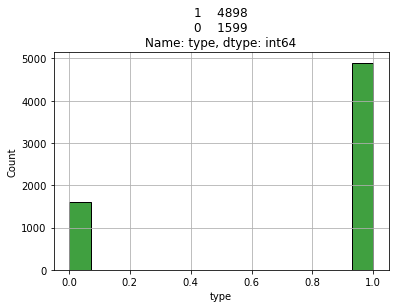

In [36]:
sns.histplot(wine['type'],color='green')
plt.title("{}".format(wine['type'].value_counts()))
plt.grid()
plt.show()

In [37]:
wine_shuffle=wine.sample(frac=1)
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2350            7.9              0.31         0.22            13.3      0.048   
1275            6.2              0.22         0.27             1.5      0.064   
904             6.8              0.59         0.06             6.0      0.060   
2129            6.8              0.28         0.39             1.4      0.036   
1072            7.2              0.35         0.26             1.8      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2350                 46.0                 212.0  0.99942  3.47       0.59   
1275                 20.0                 132.0  0.99380  3.22       0.46   
904                  11.0                  18.0  0.99620  3.41       0.59   
2129                 15.0                 115.0  0.99180  3.27       0.72   
1072                 33.0                  75.0  0.99680  3.40       0.58   

      alcohol  quality  type  
2350     10.0      

In [38]:
wine_np = wine_shuffle.to_numpy()
print(type(wine_np))

<class 'numpy.ndarray'>


In [39]:
print("Total dataset Index : ",len(wine_np))
train_idx = int(len(wine_np)*0.8)
print("train_idx :",train_idx)

Total dataset Index :  6497
train_idx : 5197


In [40]:
train_X,train_Y = wine_np[:train_idx,:-1],wine_np[:train_idx,-1]
test_X,test_Y = wine_np[train_idx:,:-1],wine_np[train_idx:,-1]
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [41]:
print(train_Y[0])
print(train_Y[1])
print(train_Y[2])
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y,num_classes=2)
test_Y_to_categorical = tf.keras.utils.to_categorical(test_Y,num_classes=2)
print("after to categorical")
print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

1.0
1.0
0.0
after to categorical
1.0
1.0
0.0


In [42]:
print(train_Y.shape)
print(test_Y.shape)

(5197,)
(1300,)


In [43]:
model_swish_sigmoid = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units = 48, activation = 'swish', 
                                                                 input_shape = (12,)),
                                           tf.keras.layers.Dense(units = 24, activation = 'swish'),
                                           tf.keras.layers.Dense(units = 12, activation = 'swish'),
                                           tf.keras.layers.Dense(units = 2,  activation = 'sigmoid')
]) 

In [44]:
model_swish_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

In [45]:
tf.random.set_seed(9876)

history = model_swish_sigmoid.fit(train_X, train_Y_to_categorical, epochs = 50, batch_size = 32, 
                                  validation_split = 0.2,
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, 
                                                                                monitor='val_loss')])

Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 1.0302 - accuracy: 0.8956 - val_loss: 0.2034 - val_accuracy: 0.9288
Epoch 2/50
130/130 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9367 - val_loss: 0.1409 - val_accuracy: 0.9510
Epoch 3/50
130/130 [==============================] - 0s 1ms/step - loss: 0.1614 - accuracy: 0.9447 - val_loss: 0.1722 - val_accuracy: 0.9692
Epoch 4/50
130/130 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.9382 - val_loss: 0.1166 - val_accuracy: 0.9654
Epoch 5/50
130/130 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9572 - val_loss: 0.0871 - val_accuracy: 0.9615
Epoch 6/50
130/130 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.9567 - val_loss: 0.0754 - val_accuracy: 0.9740
Epoch 7/50
130/130 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9603 - val_loss: 0.1337 - val_accuracy: 0.9490
Epoch 

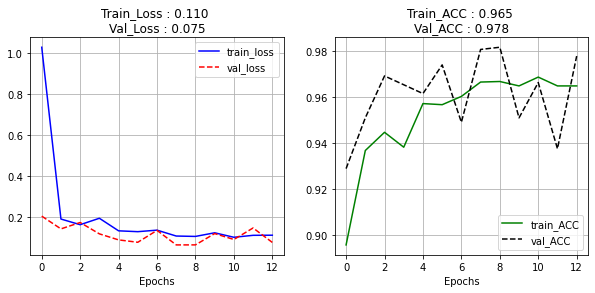

In [48]:
val_accuracy = history.history['val_accuracy']
accuracy     = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(history.history['loss'],'b-',label='train_loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')

plt.xlabel("Epochs")

plt.title("Train_Loss : {:.3f} \nVal_Loss : {:.3f}".format(loss[-1],val_loss[-1]))
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='train_ACC')
plt.plot(history.history['val_accuracy'],'k--',label='val_ACC')

plt.xlabel("Epochs")

plt.title("Train_ACC : {:.3f} \nVal_ACC : {:.3f}".format(accuracy[-1],val_accuracy[-1]))
plt.legend()
plt.grid()

In [49]:
model_swish_sigmoid.evaluate(test_X,test_Y_to_categorical)

41/41 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9677


[0.10054293274879456, 0.9676923155784607]

In [51]:
pred_Y = model_swish_sigmoid.predict(test_X)
print(np.round(pred_Y[:20],2))

[[0.   1.  ]
 [0.01 0.98]
 [0.   1.  ]
 [0.99 0.01]
 [0.03 0.97]
 [0.03 0.96]
 [0.   1.  ]
 [0.1  0.9 ]
 [0.   0.99]
 [0.03 0.97]
 [1.   0.01]
 [1.   0.01]
 [1.   0.01]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.98]
 [0.95 0.05]
 [0.03 0.97]
 [0.14 0.86]
 [0.   1.  ]]
